In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sales_dataset.csv')
df

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel
0,O1,2023-01-21,P6734,Rice,Groceries,3,390.95,C16265,Islamabad,Online
1,O2,2023-06-01,P9322,Jacket,Clothing,5,302.55,C77221,Multan,In-Store
2,O3,2023-10-04,P2184,Sugar,Groceries,2,95.00,C63707,Lahore,In-Store
3,O4,2023-02-28,P3558,Ball,Toys,1,149.16,C28431,Faisalabad,In-Store
4,O5,2023-05-11,P4556,Shoes,Clothing,4,298.25,C13890,Quetta,Online
...,...,...,...,...,...,...,...,...,...,...
49995,O49996,2023-07-20,P4645,Jacket,Clothing,5,152.22,C96503,Quetta,Online
49996,O49997,2023-03-22,P1280,Smartphone,Electronics,3,432.80,C50355,Quetta,In-Store
49997,O49998,2023-01-08,P8888,Frying Pan,Kitchenware,2,285.03,C99514,Quetta,Online
49998,O49999,2023-03-12,P9775,Charger,Electronics,2,471.63,C79838,Karachi,In-Store


In [4]:
# df['order_id'] = df['order_id'].apply(lambda x: x.split('O')[1])
# df['order_id'] = df['order_id'].astype(int)
# df['date'] = pd.to_datetime(df['date'])
# df['date'].dtype

In [5]:
df.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel
0,O1,2023-01-21,P6734,Rice,Groceries,3,390.95,C16265,Islamabad,Online
1,O2,2023-06-01,P9322,Jacket,Clothing,5,302.55,C77221,Multan,In-Store
2,O3,2023-10-04,P2184,Sugar,Groceries,2,95.00,C63707,Lahore,In-Store
3,O4,2023-02-28,P3558,Ball,Toys,1,149.16,C28431,Faisalabad,In-Store
4,O5,2023-05-11,P4556,Shoes,Clothing,4,298.25,C13890,Quetta,Online


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      50000 non-null  object 
 1   date          50000 non-null  object 
 2   product_id    50000 non-null  object 
 3   product_name  50000 non-null  object 
 4   category      50000 non-null  object 
 5   qty           50000 non-null  int64  
 6   price         50000 non-null  float64
 7   customer_id   50000 non-null  object 
 8   city          50000 non-null  object 
 9   channel       50000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.8+ MB


In [7]:
df.isna().sum()

order_id        0
date            0
product_id      0
product_name    0
category        0
qty             0
price           0
customer_id     0
city            0
channel         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,qty,price
count,50000.000000,50000.000000
mean,2.999800,252.972407
std,1.414539,143.068068
min,1.000000,5.000000
25%,2.000000,129.035000
50%,3.000000,253.065000
75%,4.000000,377.345000
max,5.000000,499.980000


# **KPIs**

**Total Revenue**

In [10]:
df['total_revenue'] = df['qty'] * df['price']
total_revenue = df['total_revenue'].sum()
total_revenue

np.float64(37978934.79)

**Total Orders**

In [11]:
total_orders = df['order_id'].count()
total_orders

np.int64(50000)

**Average Order Value**

In [12]:
avg_order_val = (total_revenue / total_orders).round(2)
avg_order_val

np.float64(759.58)

**Month-over-month (MoM) revenue growth**

In [13]:
df['order_id'] = df['order_id'].apply(lambda x: x.split('O')[1])

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()

In [15]:
mom_revenue = df.groupby('month')['total_revenue'].sum()
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"]
mom_revenue = mom_revenue.reindex(month_order)
mom_revenue

month
January      3225682.23
February     3034255.80
March        3113387.96
April        3149446.78
May          3232356.97
June         3138737.72
July         3234402.98
August       3230760.31
September    3070082.85
October      3140291.78
November     3155128.49
December     3254400.92
Name: total_revenue, dtype: float64

In [16]:
mom_growth = (mom_revenue.pct_change() * 100).round(2)
mom_growth

month
January       NaN
February    -5.93
March        2.61
April        1.16
May          2.63
June        -2.90
July         3.05
August      -0.11
September   -4.97
October      2.29
November     0.47
December     3.15
Name: total_revenue, dtype: float64

In [17]:
data = {
    'Month':  ["January","February","March","April","May","June",
    "July","August","September","October","November","December"],
    'Monthly Revenue': mom_revenue.values,
    "Monthly Growth": mom_growth.values
}
d = pd.DataFrame(data)
d.fillna('0')

,Month,Monthly Revenue,Monthly Growth
0,January,3225682.23,0
1,February,3034255.80,-5.93
2,March,3113387.96,2.61
3,April,3149446.78,1.16
4,May,3232356.97,2.63
5,June,3138737.72,-2.9
6,July,3234402.98,3.05
7,August,3230760.31,-0.11
8,September,3070082.85,-4.97
9,October,3140291.78,2.29


# **Visuals**

**Monthly revenue trend (line chart)**

In [18]:
df1 = df.sort_values(by= 'date').reset_index(drop=True)
df1.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel,total_revenue,month
0,18746,2023-01-01,P9909,Frying Pan,Kitchenware,3,160.12,C14204,Multan,Online,480.36,January
1,19452,2023-01-01,P7042,Laptop,Electronics,2,476.92,C91741,Lahore,Online,953.84,January
2,43382,2023-01-01,P2452,Doll,Toys,5,382.75,C60812,Multan,In-Store,1913.75,January
3,40633,2023-01-01,P6550,Hotpot,Kitchenware,4,385.40,C72089,Multan,In-Store,1541.60,January
4,2201,2023-01-01,P1552,Cooker,Kitchenware,4,320.09,C30140,Lahore,In-Store,1280.36,January


In [19]:
x= df1.groupby('month')['total_revenue'].sum()
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

x.index = pd.CategoricalIndex(x.index, categories=month_order, ordered=True)
x = x.sort_index()

Text(-6.152777777777784, 0.5, 'Revenue')

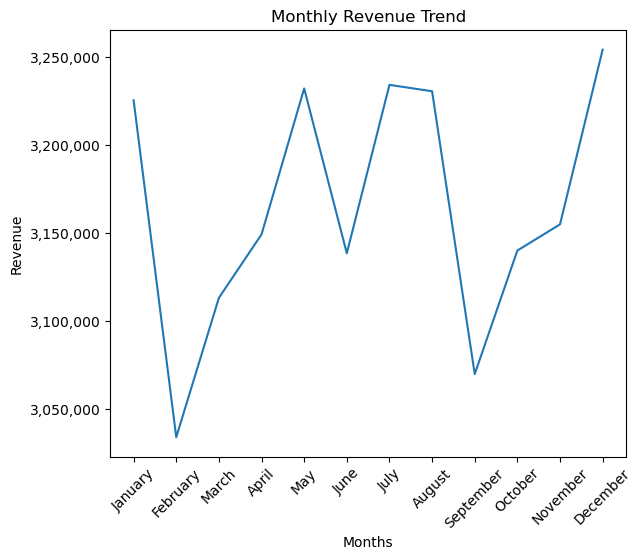

In [20]:
import matplotlib.ticker as ticker
plt.plot(x.index, x.values)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.tight_layout()
plt.xticks(rotation= 45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Months")
plt.ylabel("Revenue")

**Top 10 products by revenue**

In [21]:
df1.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel,total_revenue,month
0,18746,2023-01-01,P9909,Frying Pan,Kitchenware,3,160.12,C14204,Multan,Online,480.36,January
1,19452,2023-01-01,P7042,Laptop,Electronics,2,476.92,C91741,Lahore,Online,953.84,January
2,43382,2023-01-01,P2452,Doll,Toys,5,382.75,C60812,Multan,In-Store,1913.75,January
3,40633,2023-01-01,P6550,Hotpot,Kitchenware,4,385.40,C72089,Multan,In-Store,1541.60,January
4,2201,2023-01-01,P1552,Cooker,Kitchenware,4,320.09,C30140,Lahore,In-Store,1280.36,January


product_name
Ball          1812565.97
Car           1826122.34
Charger       1951795.69
Cooker        1948506.66
Doll          1868774.48
Frying Pan    1932654.04
Headphones    1940287.08
Hotpot        1877520.88
Jacket        1978636.10
Jeans         1890950.08
Name: total_revenue, dtype: float64

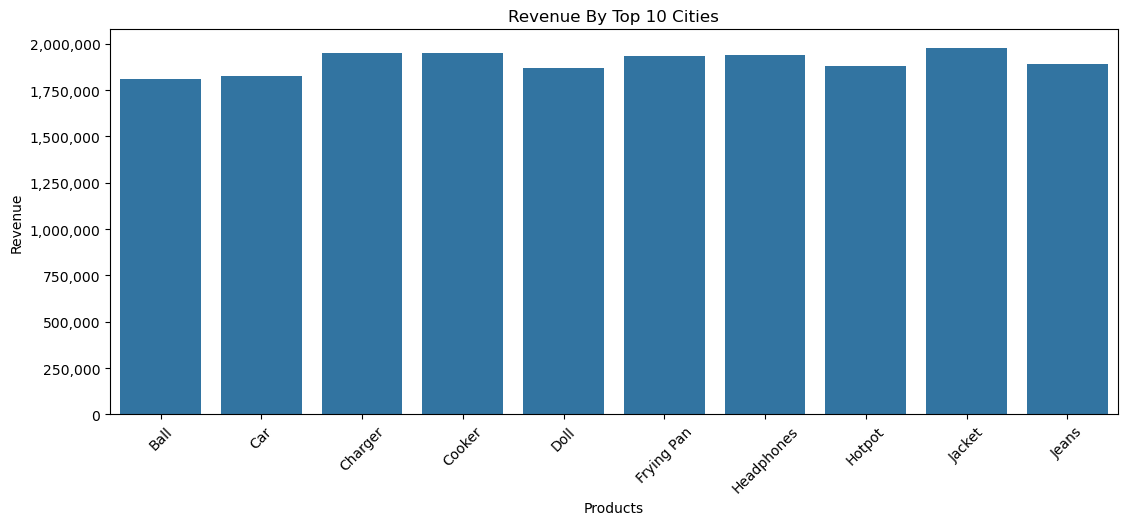

In [22]:
top10_prod = df1.groupby('product_name')['total_revenue'].sum().head(10)
plt.figure(figsize=(13, 5))
sns.barplot(x= top10_prod.index, y= top10_prod.values)
plt.xticks(rotation= 45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.title("Revenue By Top 10 Cities")
top10_prod


**Category contribution (pie/bar)**

In [23]:
df1.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel,total_revenue,month
0,18746,2023-01-01,P9909,Frying Pan,Kitchenware,3,160.12,C14204,Multan,Online,480.36,January
1,19452,2023-01-01,P7042,Laptop,Electronics,2,476.92,C91741,Lahore,Online,953.84,January
2,43382,2023-01-01,P2452,Doll,Toys,5,382.75,C60812,Multan,In-Store,1913.75,January
3,40633,2023-01-01,P6550,Hotpot,Kitchenware,4,385.40,C72089,Multan,In-Store,1541.60,January
4,2201,2023-01-01,P1552,Cooker,Kitchenware,4,320.09,C30140,Lahore,In-Store,1280.36,January


In [24]:
df1['percentage'] = (df1['total_revenue'] / df1['total_revenue'].sum()) * 100
df1.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel,total_revenue,month,percentage
0,18746,2023-01-01,P9909,Frying Pan,Kitchenware,3,160.12,C14204,Multan,Online,480.36,January,0.001265
1,19452,2023-01-01,P7042,Laptop,Electronics,2,476.92,C91741,Lahore,Online,953.84,January,0.002511
2,43382,2023-01-01,P2452,Doll,Toys,5,382.75,C60812,Multan,In-Store,1913.75,January,0.005039
3,40633,2023-01-01,P6550,Hotpot,Kitchenware,4,385.40,C72089,Multan,In-Store,1541.60,January,0.004059
4,2201,2023-01-01,P1552,Cooker,Kitchenware,4,320.09,C30140,Lahore,In-Store,1280.36,January,0.003371


In [25]:
cat_rev_per = df1.groupby('category')['percentage'].sum().round(2)
cat_rev_per

category
Clothing       20.33
Electronics    20.02
Groceries      19.80
Kitchenware    20.02
Toys           19.84
Name: percentage, dtype: float64

Text(0.5, 1.0, 'Category Contribution')

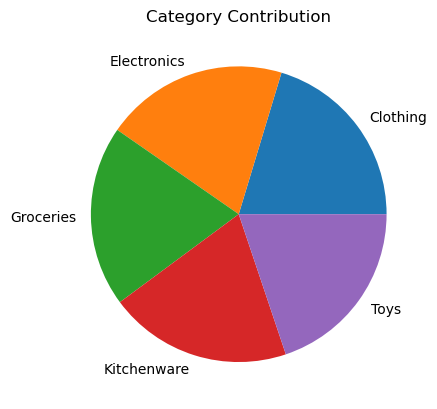

In [26]:
plt.pie(cat_rev_per, labels=cat_rev_per.index)
plt.title('Category Contribution')

**Revenue by city (bar chart)**

In [27]:
df1.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel,total_revenue,month,percentage
0,18746,2023-01-01,P9909,Frying Pan,Kitchenware,3,160.12,C14204,Multan,Online,480.36,January,0.001265
1,19452,2023-01-01,P7042,Laptop,Electronics,2,476.92,C91741,Lahore,Online,953.84,January,0.002511
2,43382,2023-01-01,P2452,Doll,Toys,5,382.75,C60812,Multan,In-Store,1913.75,January,0.005039
3,40633,2023-01-01,P6550,Hotpot,Kitchenware,4,385.40,C72089,Multan,In-Store,1541.60,January,0.004059
4,2201,2023-01-01,P1552,Cooker,Kitchenware,4,320.09,C30140,Lahore,In-Store,1280.36,January,0.003371


city
Faisalabad    5427078.56
Islamabad     5408609.34
Karachi       5302598.83
Lahore        5429176.28
Multan        5424158.85
Peshawar      5485921.96
Quetta        5501390.97
Name: total_revenue, dtype: float64

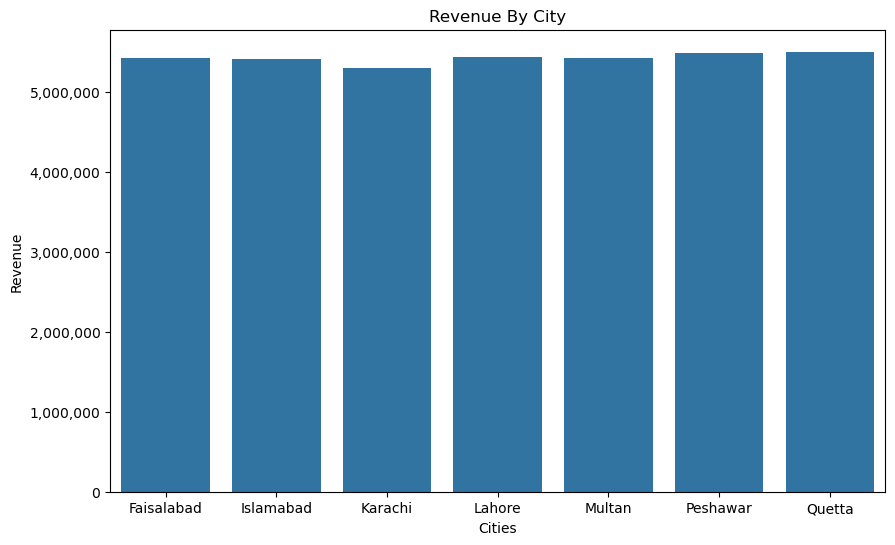

In [33]:
city_rev =  df1.groupby('city')['total_revenue'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x= city_rev.index, y= city_rev.values)
plt.title("Revenue By City")
plt.xlabel('Cities')
plt.ylabel('Revenue')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
city_rev

**Online vs In-Store revenue comparison (bar/stacked chart)**

In [29]:
df1.head()

,order_id,date,product_id,product_name,category,qty,price,customer_id,city,channel,total_revenue,month,percentage
0,18746,2023-01-01,P9909,Frying Pan,Kitchenware,3,160.12,C14204,Multan,Online,480.36,January,0.001265
1,19452,2023-01-01,P7042,Laptop,Electronics,2,476.92,C91741,Lahore,Online,953.84,January,0.002511
2,43382,2023-01-01,P2452,Doll,Toys,5,382.75,C60812,Multan,In-Store,1913.75,January,0.005039
3,40633,2023-01-01,P6550,Hotpot,Kitchenware,4,385.40,C72089,Multan,In-Store,1541.60,January,0.004059
4,2201,2023-01-01,P1552,Cooker,Kitchenware,4,320.09,C30140,Lahore,In-Store,1280.36,January,0.003371


In [30]:
channel_rev = df1.groupby('channel')['total_revenue'].sum()
channel_rev

channel
In-Store    18818814.93
Online      19160119.86
Name: total_revenue, dtype: float64

Text(0, 0.5, 'Revenue')

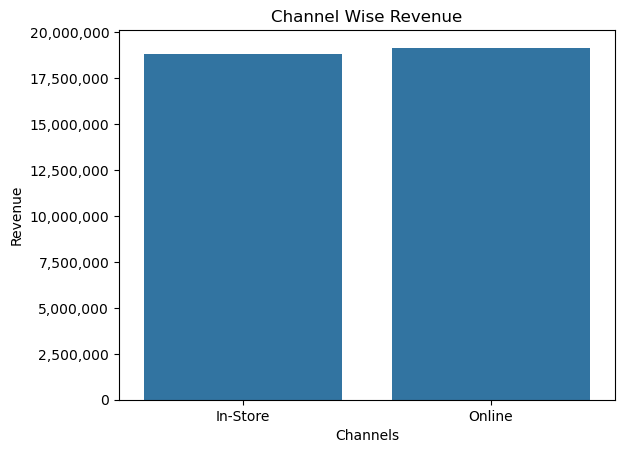

In [31]:
sns.barplot(x= channel_rev.index, y= channel_rev.values)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title("Channel Wise Revenue")
plt.xlabel("Channels")
plt.ylabel("Revenue")

In [32]:
df1.to_excel("2_sales_project.xlsx", index= False)